In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

%matplotlib inline

In [49]:
data= pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [50]:
data.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [51]:
data.shape

(583, 11)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [53]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [54]:
print('missing values')

missing values


In [55]:
data.duplicated().sum()

13

In [56]:
result_counts = data['is_patient'].value_counts()
count_of_ones = result_counts.get(1, 0)  # Get the count of 1, or 0 if it doesn't exist
print(f"Number of liver disease detected: {count_of_ones}")

count_of_ones = result_counts.get(2, 0)
print(f"Number of no liver disease detected: {count_of_ones}")

Number of liver disease detected: 416
Number of no liver disease detected: 167


In [57]:
print('missing,duplicate and imbalance dataset')

missing,duplicate and imbalance dataset


In [58]:
data['gender']=data['gender'].apply(lambda x:1 if x=='Male' else 0)

In [59]:
data['is_patient'] = data['is_patient'].map({2:0,1:1})

<AxesSubplot: >

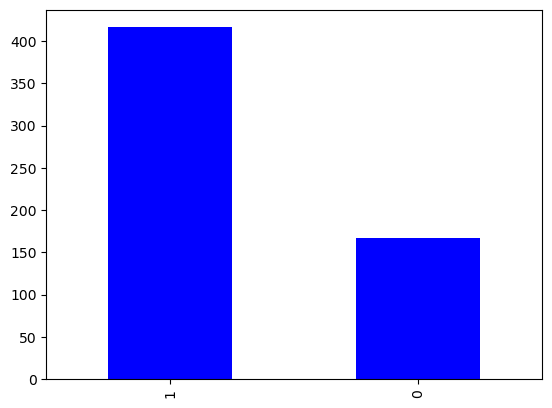

In [60]:
data['is_patient'].value_counts().plot.bar(color='blue')

In [61]:
print('data imbalance')

data imbalance


In [62]:
X=data.iloc[:,:-1]

y = data['is_patient']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [64]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_pca = imputer.fit_transform(X_train_std)
X_test_pca = imputer.transform(X_test_std)

In [66]:
#Determine the number of components to retain
pca = PCA()
pca.fit(X_train_pca)
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)
threshold = 0.95
num_components = np.argmax(cumulative_variances >= threshold) + 1
#Applying PCA 
pca = PCA(n_components=num_components)  
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

In [67]:
X.shape

(583, 10)

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
predictions1 = logreg.predict(X_test_pca)
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.7521367521367521


In [71]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree Classifier on the training data
dt_classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_pca)

# Calculate the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.7350427350427351


In [73]:
model = RandomForestClassifier(n_estimators=100)

# train the model using the training data
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Calculate the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of random Forest Classifier:", accuracy)

Accuracy of random Forest Classifier: 0.7777777777777778


In [74]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Predictions
y_pred = knn.predict(X_test_pca)

# Calculate the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of knn:", accuracy)

Accuracy of knn: 0.6666666666666666


In [75]:
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_pca)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7435897435897436
